In [1]:
# install
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 7.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
project_dir = r'/content/drive/MyDrive/Colab Data/project'
task_name = 'HCI dataset10'
data_path = os.path.join(project_dir,task_name,'data.yaml')
output_folder = r'/content/drive/MyDrive/Colab Data/output/{}'.format(task_name)
if not os.path.isdir(output_folder):
  os.mkdir(output_folder)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

labels= ['NG1']
single_cls_= True


 22        [15, 18, 21]  1   1150432  ultralytics.nn.modules.head.Segment          [80, 32, 64, [64, 128, 256]]  
YOLOv8n-seg summary: 261 layers, 3409968 parameters, 3409952 gradients

hyp dict passed. Overriding params with {'lr0': 0.01, 'lrf': 0.002, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'pose': 12.0, 'kobj': 1.0, 'label_smoothing': 0.0, 'nbs': 64, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.0, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.5, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 1.0, 'copy_paste': 1.0, 'optimizer': 'SGD', 'workers': 0}.
Ultralytics YOLOv8.0.188 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=/content/drive/MyDrive/Colab Data/project/HCI dataset10/data.yaml, epochs=300, patience=0, batch=8, imgsz=640, save=True, save_period=-1, cache

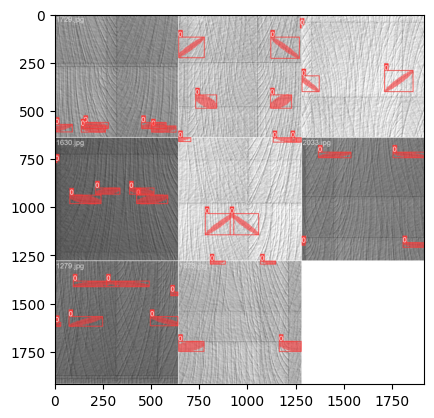

  7%|▋         | 1/14 [00:01<00:15,  1.22s/it]

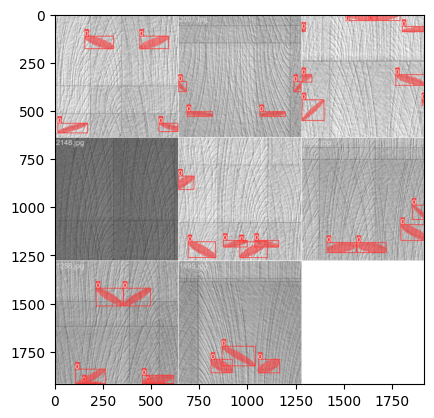

 14%|█▍        | 2/14 [00:01<00:11,  1.08it/s]

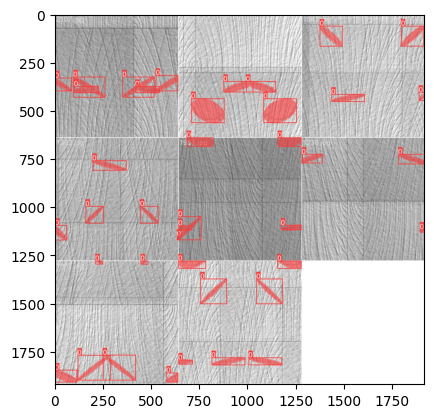

 21%|██▏       | 3/14 [00:03<00:11,  1.04s/it]

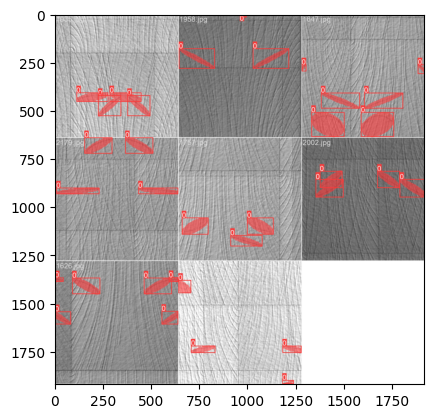

 29%|██▊       | 4/14 [00:04<00:11,  1.11s/it]

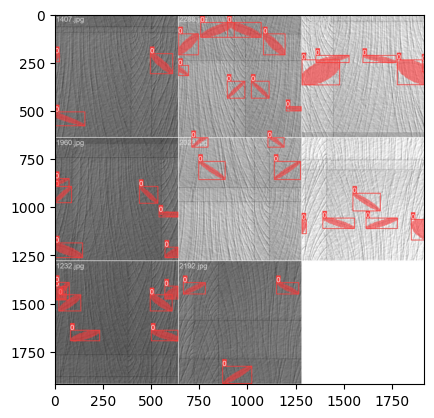

 36%|███▌      | 5/14 [00:05<00:10,  1.15s/it]

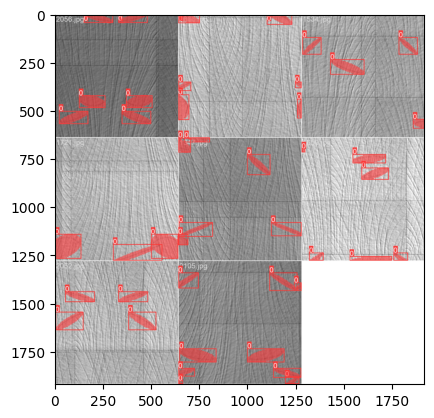

 43%|████▎     | 6/14 [00:06<00:09,  1.17s/it]

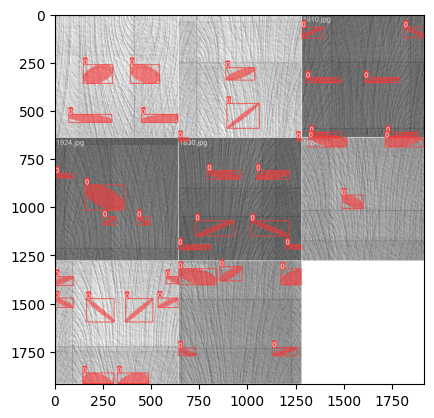

 50%|█████     | 7/14 [00:07<00:07,  1.06s/it]

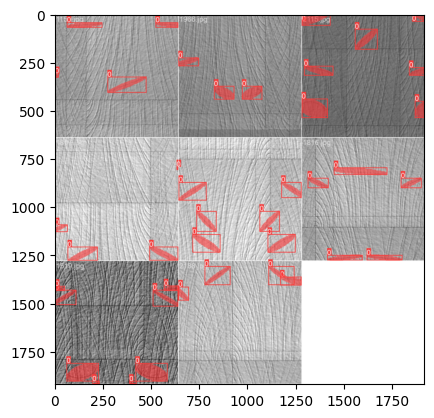

 57%|█████▋    | 8/14 [00:08<00:05,  1.05it/s]

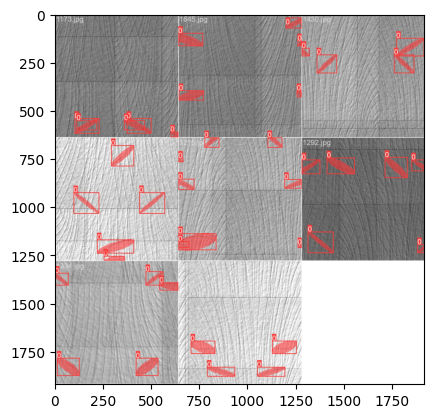

 64%|██████▍   | 9/14 [00:09<00:04,  1.12it/s]

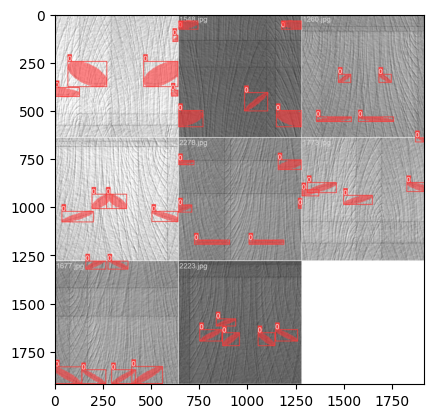

 71%|███████▏  | 10/14 [00:09<00:03,  1.19it/s]

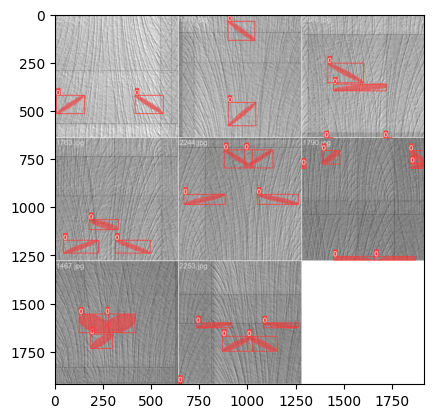

 79%|███████▊  | 11/14 [00:10<00:02,  1.23it/s]

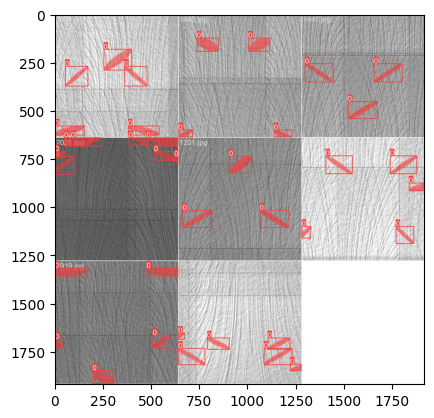

 86%|████████▌ | 12/14 [00:11<00:01,  1.25it/s]

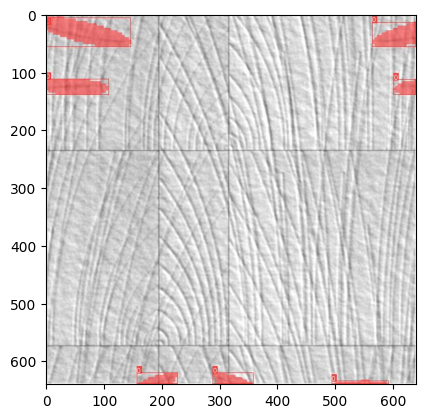

 93%|█████████▎| 13/14 [00:11<00:00,  1.50it/s]

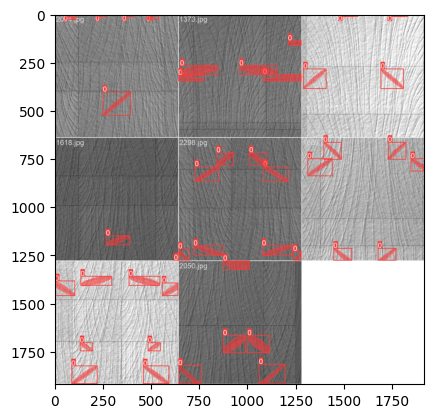

100%|██████████| 14/14 [00:12<00:00,  1.12it/s]


In [5]:
import yaml
from pathlib import Path
from typing import Union
from ultralytics import YOLO
import torch
from ultralytics.models.yolo.segment import SegmentationTrainer
from ultralytics.utils import (DEFAULT_CFG, LOGGER,yaml_load)
from ultralytics.utils.checks import check_yaml
from ultralytics.models import yolo
from ultralytics.nn.tasks import (ClassificationModel, DetectionModel, PoseModel, SegmentationModel)
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tqdm import tqdm
import glob

class v8_DetectionTrainer(SegmentationTrainer):
    def __init__(self, cfg=DEFAULT_CFG, overrides=None, _callbacks=None):
        """Initialize a SegmentationTrainer object with given arguments."""
        #print('enter v8_SegmentationTrainer __init__')
        if overrides is None:
            overrides = {}
        overrides['task'] = 'detect'
        super().__init__(cfg, overrides, _callbacks)

    def train(self):
        '''
        override original train from BaseTrainer
        '''
        self._setup_train(1)

class v8_SegmentationTrainer(SegmentationTrainer):
    def __init__(self, cfg=DEFAULT_CFG, overrides=None, _callbacks=None):
        """Initialize a SegmentationTrainer object with given arguments."""
        #print('enter v8_SegmentationTrainer __init__')
        if overrides is None:
            overrides = {}
        overrides['task'] = 'segment'
        super().__init__(cfg, overrides, _callbacks)

    def train(self):
        '''
        override original train from BaseTrainer
        '''
        self._setup_train(1)

# wrap from ultralytics.yolo.engine.model import TASK_MAP
dummy_TASK_MAP = {
    'classify': [
        ClassificationModel, yolo.classify.ClassificationTrainer, yolo.classify.ClassificationValidator,
        yolo.classify.ClassificationPredictor],
    'detect': [
        DetectionModel, v8_DetectionTrainer, yolo.detect.DetectionValidator,
        yolo.detect.DetectionPredictor],
    'segment': [
        SegmentationModel, v8_SegmentationTrainer, yolo.segment.SegmentationValidator,
        yolo.segment.SegmentationPredictor],
    'pose': [PoseModel, yolo.pose.PoseTrainer, yolo.pose.PoseValidator, yolo.pose.PosePredictor]}

class y8_YOLO(YOLO):
    def __init__(self, model: Union[str, Path] = 'yolov8n.pt', task=None) -> None:
        super().__init__(model, task)

    def train(self, **kwargs):
        """
        Trains the model on a given dataset.

        Args:
            **kwargs (Any): Any number of arguments representing the training configuration.
        """
        self._check_is_pytorch_model()
        if self.session:  # Ultralytics HUB session
            if any(kwargs):
                LOGGER.warning('WARNING ⚠️ using HUB training arguments, ignoring local training arguments.')
            kwargs = self.session.train_args
        #check_pip_update_available()
        overrides = self.overrides.copy()
        overrides.update(kwargs)
        if kwargs.get('cfg'):
            LOGGER.info(f"cfg file passed. Overriding default params with {kwargs['cfg']}.")
            overrides = yaml_load(check_yaml(kwargs['cfg']))
        #********************** update hyp start **********************
        if kwargs.get('hyp'):
            if isinstance(kwargs['hyp'], dict):
                LOGGER.info(f"hyp dict passed. Overriding params with {kwargs['hyp']}.")
                config = kwargs['hyp']
                for k,v  in list(config.items()):
                   if v is None:
                      del config[k]
                overrides.update(config)
            del overrides['hyp']
            del kwargs['hyp']
        #********************** update hyp end **********************
        overrides['mode'] = 'train'
        if not overrides.get('data'):
            raise AttributeError("Dataset required but missing, i.e. pass 'data=coco128.yaml'")
        if overrides.get('resume'):
            overrides['resume'] = self.ckpt_path
        self.task = overrides.get('task') or self.task
        self.trainer = dummy_TASK_MAP[self.task][1](overrides=overrides, _callbacks=self.callbacks)
        if not overrides.get('resume'):  # manually set model only if not resuming
            self.trainer.model = self.trainer.get_model(weights=self.model if self.ckpt else None, cfg=self.model.yaml)
            self.model = self.trainer.model
        self.trainer.hub_session = self.session  # attach optional HUB session
        self.trainer.train()

labels = None
single_cls_ = False
if os.path.isfile(data_path):
    with open(data_path, 'r') as f:
        data = yaml.safe_load(f)
        labels = data['names']
        labels = list(labels.values())
        single_cls_ = len(labels)==1

print('labels=',labels)
print('single_cls_=',single_cls_)
model_name = "yolov8n-seg.yaml"
model = y8_YOLO(model_name)
imgsz = 640

hyp = dict()
# Hyperparameters ---------------------------------------------------------
hyp['lr0']= 0.01  # initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
hyp['lrf']= 0.002  # final learning rate (lr0 * lrf)
hyp['momentum']= 0.937  # SGD momentum/Adam beta1
hyp['weight_decay']= 0.0005  # optimizer weight decay 5e-4
hyp['warmup_epochs']= 3.0  # warmup epochs (fractions ok)
hyp['warmup_epochs']= 0  # warmup epochs (fractions ok)
hyp['warmup_momentum']= 0.8  # warmup initial momentum
hyp['warmup_bias_lr']= 0.1  # warmup initial bias lr
hyp['box']= 7.5  # box loss gain
hyp['cls']= 0.5  # cls loss gain (scale with pixels)
hyp['dfl']= 1.5  # dfl loss gain
hyp['pose']= 12.0  # pose loss gain
hyp['kobj']= 1.0  # keypoint obj loss gain
hyp['label_smoothing']= 0.0  # label smoothing (fraction)
hyp['nbs']= 64  # nominal batch size
hyp['hsv_h']= 0.015  # image HSV-Hue augmentation (fraction)
hyp['hsv_s']= 0.7  # image HSV-Saturation augmentation (fraction)
hyp['hsv_v']= 0.4  # image HSV-Value augmentation (fraction)
hyp['degrees']= 0.0  # image rotation (+/- deg)
hyp['translate']= 0.1  # image translation (+/- fraction)
hyp['scale']= 0.0  # image scale (+/- gain)
hyp['shear']= 0.0  # image shear (+/- deg)
hyp['perspective']= 0.0  # image perspective (+/- fraction), range 0-0.001
hyp['flipud']= 0.5  # image flip up-down (probability)
hyp['fliplr']= 0.5  # image flip left-right (probability)
#hyp['mosaic']= 0.5  # image mosaic (probability)
hyp['mosaic']= 1.0  # image mosaic (probability)
hyp['mixup']= 1.0  # image mixup (probability)
hyp['copy_paste']= 1.0  # segment copy-paste (probability)
# others ------------------------------------------------------------------
hyp['optimizer']= 'SGD' # optimizer to use, choices=['SGD', 'Adam', 'AdamW', 'RMSProp']
epochs = 300
batch_size = 8
hyp['workers']= 0

model.train(batch=batch_size,augment=True,project=project_dir,name=task_name,hyp=hyp,data=data_path, epochs=epochs, imgsz=imgsz,exist_ok = True,patience = 0,single_cls = single_cls_)
pbar = enumerate(model.trainer.train_loader)
model.trainer.save_dir = Path(output_folder)
ni = 0
for i, batch in pbar:
    model.trainer.plot_training_samples(batch, ni)
    ni= ni+1
    #if ni > 100:
    #    break
image_list = glob.glob(output_folder+'/*.jpg')
for image_path in tqdm(image_list):
    #im = Image.open(image)
    im = np.asarray(Image.open(image_path))
    plt.imshow(im)
    plt.show()